# Machine Learning Interpretability

---

## 1. What is Machine Learning Interpretability?

Machine Learning Interpretability is **how well a human can understand why a model made a specific prediction**.

### Anecdote:

Imagine you're a judge. A computer gives you a decision: "Do not grant bail." You’d want to know *why*. Was it the defendant’s record? Age? Past behavior? Interpretability helps you *understand the reasoning* behind machine predictions.

---

## 2. Why Is Interpretability Important?

* **Trust**: Users trust models they can understand.
* **Accountability**: Especially important in healthcare, finance, or law.
* **Debugging**: Helps identify bias, errors, or wrong assumptions.

---

## 3. Two Types of Models by Interpretability

| Model Type    | Example Algorithms                       | Interpretability  |
| ------------- | ---------------------------------------- | ----------------- |
| **White-Box** | Linear Regression, Decision Trees        | Easy to interpret |
| **Black-Box** | Neural Networks, Random Forests, XGBoost | Hard to interpret |

---

## 4. White-Box Models

### These are **transparent models** – you can see the "decision process".

#### Example: Linear Regression

**Model**:

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

### Python Code Example:

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Sample data
df = pd.DataFrame({
    'age': [25, 32, 47],
    'salary': [50000, 60000, 75000]
})
y = [1, 0, 1]  # 1 = Will buy, 0 = Won’t buy

model = LinearRegression()
model.fit(df, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.55555556e-01 -4.88888889e-04]
Intercept: 11.555555555555548


### Explanation:

* `model.coef_` tells us how much each feature affects the outcome.
* Positive = increases chance of prediction being 1.
* Negative = decreases it.

---

## 5. Interpreting White-Boxes: Building a Decision Engine

### Example: Decision Tree

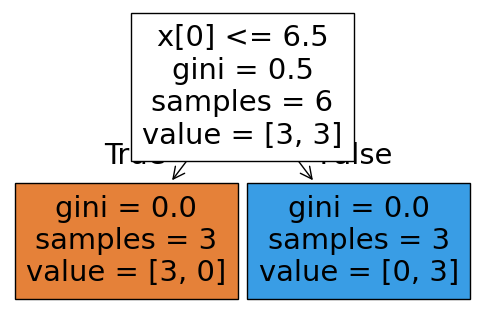

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = [[1], [2], [3], [10], [11], [12]]
y = [0, 0, 0, 1, 1, 1]

model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

plt.figure(figsize=(6,4))
plot_tree(model, filled=True)
plt.show()

### What is this doing?

* Splits data like a series of yes/no questions.
* If value > 5.5 → Predict 1, else 0.

#### Advantage:

You can follow the path and understand **exactly why** a decision was made.

---

## 6. Black-Box Models

These are models where we **can't easily explain how the decisions were made**.

Examples: Neural Networks, Random Forests, Gradient Boosting, etc.

### Why Use Them?

* They perform **better on complex problems**, like image or voice recognition.
* But they **sacrifice transparency**.

---

## 7. Explaining Black-Boxes: Neural Networks

Neural networks are made up of **layers of interconnected neurons**. Each layer transforms the data into something new. But this transformation is often **not human-readable**.

### A Simplified Neural Network:

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(1, activation='sigmoid')
])

This model:

* Takes 4 input features.
* Processes them through a hidden layer.
* Produces a binary output (0 or 1).

---

## How Do We Interpret Black-Boxes?

### Tools:

* **SHAP** (SHapley Additive exPlanations)
* **LIME** (Local Interpretable Model-agnostic Explanations)
* **Permutation Importance**

---

## 8. Interpreting with SHAP (Example)

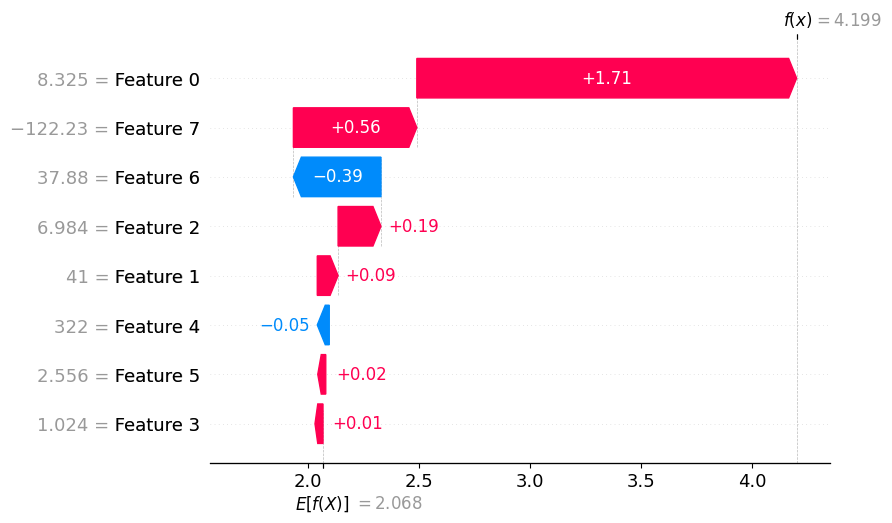

In [15]:
import shap
import xgboost
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train model
model = xgboost.XGBRegressor().fit(X, y)

# Explain predictions
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualize waterfall for first prediction
shap.plots.waterfall(shap_values[0])


### Explanation:

* This tells you how each feature **contributed to a single prediction**.
* Blue = pushed prediction lower
* Red = pushed prediction higher

---

## Exercises

1. **White Box**: Train a DecisionTreeClassifier and explain its decisions using `plot_tree()`.
2. **Black Box**: Train a neural network or XGBoost model. Use SHAP to interpret one prediction.
3. **Compare**: Train a white-box and a black-box model on the same dataset. Compare their performance and interpretability.
4. What are some real-world examples where a white-box model would be *more important* than accuracy?

---

## Summary

* **Interpretability** is key in building trust in ML models.
* **White-box models** like decision trees and linear regression are easy to understand.
* **Black-box models** are powerful but need tools like SHAP or LIME to explain.
* **Interpretation** is essential in healthcare, finance, law, and other sensitive domains.



---

# Machine Learning Interpretability – Black Box Models

## Explaining Black Boxes: Neural Networks with SHAP and LIME

---

## Introduction

As machine learning becomes more powerful, especially with complex models like **neural networks**, **XGBoost**, and **ensemble models**, it also becomes harder to **understand** why these models make the decisions they do.

This is often referred to as the **“black-box” problem** - we get an answer (a prediction), but we don't always know why.

To tackle this, we use tools like **SHAP** (SHapley Additive exPlanations) and **LIME** (Local Interpretable Model-Agnostic Explanations) to **interpret** these models.

---

## Why Interpretability Matters

Let’s say a neural network denies someone a loan.

* Would you trust it without knowing why?
* Could you appeal the decision?
* Could a doctor trust an AI diagnosis without understanding the reason?

**Interpretability bridges the gap between predictions and trust.**

---

## What is a Black Box Model?

A black box model is a model whose **internal logic is hidden** or **too complex** to explain easily.

Examples:

* Deep Neural Networks
* Gradient Boosted Trees (e.g., XGBoost)
* Random Forests

---

## Solution: Model-Agnostic Explanations

We use model-agnostic techniques like **SHAP** and **LIME**, which work **outside** the model. Think of them like asking:

> “What happens to the output when we tweak the input just a little?”

---

## LIME: Local Interpretable Model-agnostic Explanations

### How LIME works

* Pick a specific prediction (e.g., why this person was predicted “No Loan”).
* Generate small variations of the input (perturbations).
* Observe how predictions change.
* Fit a simple, interpretable model (like a linear model) around that local point.

### Code Example: Explaining a Classifier Prediction

In [16]:
import lime
import lime.lime_tabular
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Create explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
    class_names=['setosa', 'versicolor', 'virginica'],
    mode='classification'
)

# Pick a sample to explain
i = 1
exp = explainer.explain_instance(X_test[i], model.predict_proba)
html = exp.as_html()
with open("lime_explanation.html", "w", encoding="utf-8") as f:
    f.write(html)

### What LIME Shows

You’ll see a **bar chart** showing:

* Which features pushed the prediction **up**
* Which features pulled the prediction **down**

---

## SHAP: SHapley Additive ExPlanations

### What SHAP Does

SHAP is based on **game theory**. Imagine each feature is a player in a game, and the prediction is the **payout**. SHAP asks:

> “How much does each player (feature) contribute to the final payout (prediction)?”

### Key Idea

SHAP values are **additive**:
The prediction = base value + sum of SHAP values

### Code Example with Tree Models (e.g., XGBoost, Random Forest)

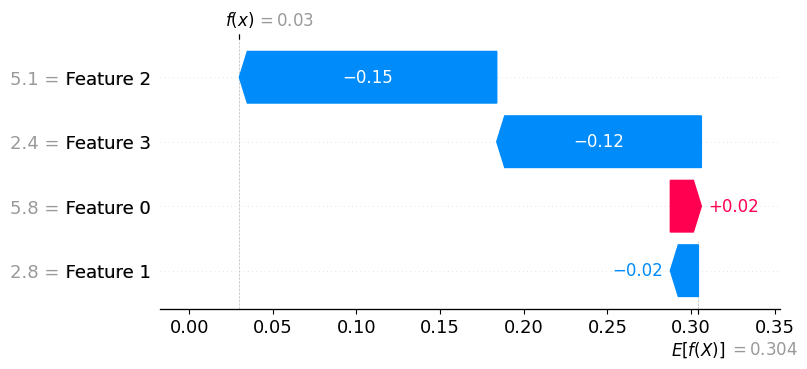

In [17]:
import shap

# Load SHAP explainer for tree-based models
explainer = shap.Explainer(model.predict_proba, X_train)
# Pick a sample to explain
shap_values = explainer(X_test)

# Visualize
shap.plots.waterfall(shap_values[0][:, 1])  # class 1

### Other Plots

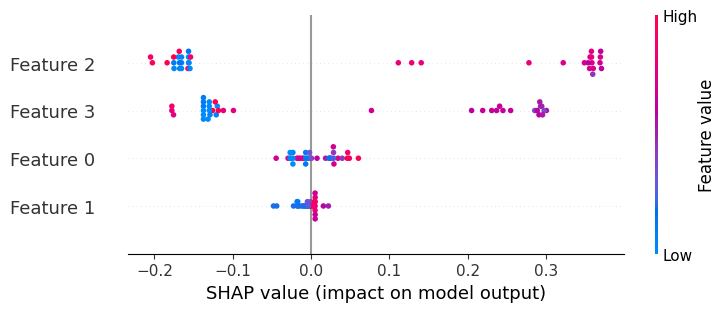

Error ignored: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


In [18]:
# Summary plot for feature importance
# Pick class index 1 for 'versicolor'
try:
    shap.plots.beeswarm(shap_values[:, :, 1])

    # Dependence plot for petal length
    shap.plots.scatter(shap_values[:, :, 1][:, "petal length"])
except Exception as e:
    print(f"Error ignored: {e}")


### What SHAP Shows

* Waterfall Plot: Step-by-step contribution of each feature to final prediction.
* Beeswarm Plot: Overall feature importance for the dataset.
* Dependence Plot: How one feature impacts predictions across examples.

---

## SHAP vs LIME: When to Use Which?

| Feature          | SHAP                       | LIME                                  |
| ---------------- | -------------------------- | ------------------------------------- |
| Method           | Global + Local             | Local only                            |
| Math Basis       | Game Theory                | Local regression                      |
| Model Support    | Tree, NN, Linear, etc.     | All models (model-agnostic)           |
| Speed            | Slower                     | Faster                                |
| Interpretability | Very accurate & consistent | Easier to explain but sometimes noisy |

---

## Example: Explaining a Neural Network

Let’s use SHAP to explain a neural network trained with Keras:

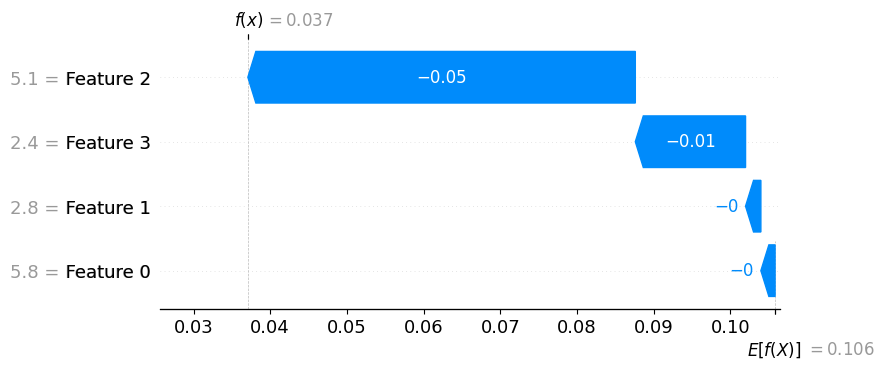

In [19]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=0)

# Explain using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot
shap.plots.waterfall(shap_values[0][:, 1])  

---

## Real-World Analogy

Imagine a restaurant bill split among friends:

* SHAP helps you know **exactly how much each friend** contributed to the bill.
* LIME is like interviewing your friends **near one table** to see who likely paid more.

---

## Summary

* Black-box models are powerful but hard to interpret.
* **LIME** helps explain individual predictions locally.
* **SHAP** gives fair, consistent attributions globally and locally.
* Both tools build **trust** and **transparency** in machine learning.

---

## Mini Exercises

1. Use `RandomForestClassifier` on a dataset and use **LIME** to explain one prediction.
2. Use `shap` to generate a **beeswarm plot** for a tree model.
3. Which features are **consistently important** across examples?
4. Try using SHAP to explain a neural network trained with Keras.

---